In [45]:
%reset
import csv
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.ndimage import median_filter
import numpy as np
import pandas as pd
from scipy import signal
import statistics as stats
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from scipy import stats
import scipy.sparse as sparse

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [46]:
def weighted_average(distribution, weights):
    return round(sum([distribution[i]*weights[i] for i in range(len(distribution))])/sum(weights),2)

def import_csv(csvfilename):
    data = []
    with open(csvfilename, "r", encoding="utf-8", errors="ignore") as scraped:
        reader = csv.reader(scraped, delimiter=' ', skipinitialspace='True')
        next(reader)
        row_index = 0
        for row in reader:
            if row:  # avoid blank lines
                #row_index += 1
                #columns = [str(row_index), row[0], row[1], row[2], row[3]]
                columns = [row[0], row[1]]
                data.append(columns)

    return data

def import_csv2(csvfilename):
    data = []
    with open(csvfilename, "r", encoding="utf-8", errors="ignore") as scraped:
        reader = csv.reader(scraped, delimiter=' ', skipinitialspace='True')
        next(reader)
        row_index = 0
        for row in reader:
            if row:  # avoid blank lines
                #row_index += 1
                #columns = [str(row_index), row[0], row[1], row[2], row[3]]
                columns = [row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8],
                           row[9], row[10] ]
                data.append(columns)

    return data

def import_csv3(csvfilename):
    data = []
    with open(csvfilename, "r", encoding="utf-8", errors="ignore") as scraped:
        reader = csv.reader(scraped, delimiter=' ', skipinitialspace='True')
        next(reader)
        row_index = 0
        for row in reader:
            if row:  # avoid blank lines
                #row_index += 1
                #columns = [str(row_index), row[0], row[1], row[2], row[3]]
                columns = [row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8],
                           row[9], row[10], row[11] ]
                data.append(columns)

    return data

def import_csv4(csvfilename):
    data = []
    with open(csvfilename, "r", encoding="utf-8", errors="ignore") as scraped:
        reader = csv.reader(scraped, delimiter=' ', skipinitialspace='True')
        next(reader)
        row_index = 0
        for row in reader:
            if row:  # avoid blank lines
                #row_index += 1
                #columns = [str(row_index), row[0], row[1], row[2], row[3]]
                columns = [row[0], row[1], row[2], row[3], row[4]]
                data.append(columns)

    return data

In [47]:
tcp_cca = (['TcpCubic', 'TcpBbr', 'TcpQtCol_1.2minRTT', 'TcpQtCol_1.5minRTT',
            'TcpQtColFair_1.2minRTT', 'TcpQtColFair_1.5minRTT'
           ])
BDP = 172
buffer_size = 1727 
print(buffer_size, tcp_cca)

1727 ['TcpCubic', 'TcpBbr', 'TcpQtCol_1.2minRTT', 'TcpQtCol_1.5minRTT', 'TcpQtColFair_1.2minRTT', 'TcpQtColFair_1.5minRTT']


In [48]:
num_flows = 1
cwnd = {}
agg_cwnd = {}
inflight = {}
rtt = {}

for algorithm in tcp_cca:
    cwnd[algorithm] = {}
    agg_cwnd[algorithm] = {}
    inflight[algorithm] = {}
    rtt[algorithm] = {}


    agg_cwnd[algorithm] = {'time': list(), 'agg_cwnd': list(), 'agg_inflight': list(),
                'aveRtt': list(), 'agg_insThruput': list(), 'agg_aveThruput': list(), 
                'agg_insGoodput': list(), 'agg_aveGoodput': list(), 'agg_TxPkts': list(), 
                'agg_ReTxPkts': list(), 'fairness': list(), 'agg_cost': list()}
        
    for i in range(num_flows):
        cwnd[algorithm][i] = {'time': list(), 'cwnd': list(), 'inflight': list(),
                'rtt': list(), 'insThruput': list(), 'aveThruput': list(), 
                'insGoodput': list(), 'aveGoodput': list(), 'TxPkts': list(), 'ReTxPkts': list(), 
                'cost': list()}
                                       
        inflight[algorithm][i] = {'time': list(), 'inflight': list(), 'cwnd': list(), 
                                           'rtt': list(), 'cost': list()}
        rtt[algorithm][i] = {'time': list(), 'rtt': list()}

cwnd_files = []
agg_cwnd_files = []
inflight_files = []
rtt_files = []
                                               
for algorithm in tcp_cca:
    print(algorithm)
    cwnd_sim_files = []
    
    agg_cwnd_files.append("../results/qt_single_changing_bw/" + str(algorithm) + "/" + 
                str(num_flows)  + "-flows/100Mbps-20ms/" + str(buffer_size) + "p-btlqueue/" + 
                algorithm + "-" + str(num_flows) + "-flows-100Mbps-20ms-" + str(buffer_size) +
                "p-" + "Agg" + "-cwnd.data")
    cwnd_flows_files = []
    
    for i in range(num_flows):
        cwnd_flows_files.append("../results/qt_single_changing_bw/" + str(algorithm) + "/" + 
                    str(num_flows)  + "-flows/100Mbps-20ms/" + str(buffer_size) + "p-btlqueue/" + 
                    algorithm + "-" + str(num_flows) + "-flows-100Mbps-20ms-" + str(buffer_size) +
                    "p-flow" + str(i) + "-cwnd.data")

        
        cwnd_files.append(cwnd_flows_files)


TcpCubic
TcpBbr
TcpQtCol_1.2minRTT
TcpQtCol_1.5minRTT
TcpQtColFair_1.2minRTT
TcpQtColFair_1.5minRTT


In [49]:
print(agg_cwnd_files[0])
print(agg_cwnd_files[1])
print(agg_cwnd_files[2])

../results/qt_single_changing_bw/TcpCubic/1-flows/100Mbps-20ms/1727p-btlqueue/TcpCubic-1-flows-100Mbps-20ms-1727p-Agg-cwnd.data
../results/qt_single_changing_bw/TcpBbr/1-flows/100Mbps-20ms/1727p-btlqueue/TcpBbr-1-flows-100Mbps-20ms-1727p-Agg-cwnd.data
../results/qt_single_changing_bw/TcpQtCol_1.2minRTT/1-flows/100Mbps-20ms/1727p-btlqueue/TcpQtCol_1.2minRTT-1-flows-100Mbps-20ms-1727p-Agg-cwnd.data


In [50]:

for algorithm  in tcp_cca:
    index_alg = tcp_cca.index(algorithm)
    print(algorithm,index_alg)

    agg_cwnd_data_in = import_csv3(agg_cwnd_files[index_alg])
    for row in agg_cwnd_data_in: 
        agg_cwnd[algorithm]['time'].append({row[0]})
        agg_cwnd[algorithm]['agg_cwnd'].append({row[1]})
        agg_cwnd[algorithm]['agg_inflight'].append({row[2]})
        agg_cwnd[algorithm]['aveRtt'].append({row[3]})
        agg_cwnd[algorithm]['agg_insThruput'].append({row[4]})
        agg_cwnd[algorithm]['agg_aveThruput'].append({row[5]})
        agg_cwnd[algorithm]['agg_insGoodput'].append({row[6]})
        agg_cwnd[algorithm]['agg_aveGoodput'].append({row[7]})
        agg_cwnd[algorithm]['agg_TxPkts'].append({row[8]})
        agg_cwnd[algorithm]['agg_ReTxPkts'].append({row[9]})
        agg_cwnd[algorithm]['fairness'].append({row[10]})
        agg_cwnd[algorithm]['agg_cost'].append({row[11]})

    for i in range(num_flows):
        cwnd_data_in = import_csv2(cwnd_files[index_alg][i])
        #inflight_data_in = import_csv4(inflight_files[index_alg][i])
        #rtt_data_in = import_csv(rtt_files[index_alg][i])

        for row in cwnd_data_in:
            cwnd[algorithm][i]['time'].append({row[0]})
            cwnd[algorithm][i]['cwnd'].append({row[1]})
            cwnd[algorithm][i]['inflight'].append({row[2]})
            cwnd[algorithm][i]['rtt'].append({row[3]})
            cwnd[algorithm][i]['insThruput'].append({row[4]})
            cwnd[algorithm][i]['aveThruput'].append({row[5]})
            cwnd[algorithm][i]['insGoodput'].append({row[6]})
            cwnd[algorithm][i]['aveGoodput'].append({row[7]})
            cwnd[algorithm][i]['TxPkts'].append({row[8]})
            cwnd[algorithm][i]['ReTxPkts'].append({row[9]})
            cwnd[algorithm][i]['cost'].append({row[10]})


TcpCubic 0
TcpBbr 1
TcpQtCol_1.2minRTT 2
TcpQtCol_1.5minRTT 3
TcpQtColFair_1.2minRTT 4
TcpQtColFair_1.5minRTT 5


In [51]:
cwnd_time = []
cwnd_value = []
inflight_value = []
rtt_value = []
insThruput_value = []
aveThruput_value = []
insGoodput_value = []
aveGoodput_value = []
cost_value = []

agg_cwnd_time = []
agg_cwnd_value = []
agg_inflight_value = []
agg_rtt_value = []
agg_insThruput_value = []
agg_aveThruput_value = []
agg_insGoodput_value = []
agg_aveGoodput_value = []
fairness_value = []
agg_cost_value = []

for algorithm in tcp_cca:
    print(algorithm)
    cwnd_time_ = []
    cwnd_value_ = []
    inflight_value_ = []
    rtt_value_ = []
    insThruput_value_ = []
    aveThruput_value_ = []
    insGoodput_value_ = []
    aveGoodput_value_ = []
    cost_value_ = []
    

    agg_cwnd_time.append(pd.DataFrame(agg_cwnd[algorithm]['time']))
    agg_cwnd_value.append(pd.DataFrame(agg_cwnd[algorithm]['agg_cwnd']))
    agg_inflight_value.append(pd.DataFrame(agg_cwnd[algorithm]['agg_inflight']))
    agg_rtt_value.append(pd.DataFrame(agg_cwnd[algorithm]['aveRtt']))
    agg_insThruput_value.append(pd.DataFrame(agg_cwnd[algorithm]['agg_insThruput']))  
    agg_aveThruput_value.append(pd.DataFrame(agg_cwnd[algorithm]['agg_aveThruput']))  
    agg_insGoodput_value.append(pd.DataFrame(agg_cwnd[algorithm]['agg_insGoodput']))  
    agg_aveGoodput_value.append(pd.DataFrame(agg_cwnd[algorithm]['agg_aveGoodput'])) 
    fairness_value.append(pd.DataFrame(agg_cwnd[algorithm]['fairness'])) 
    agg_cost_value.append(pd.DataFrame(agg_cwnd[algorithm]['agg_cost'])) 
    
    
    for i in range(num_flows):
        cwnd_time_.append(pd.DataFrame(cwnd[algorithm][i]['time']))
        cwnd_value_.append(pd.DataFrame(cwnd[algorithm][i]['cwnd']))
        cost_value_.append(pd.DataFrame(cwnd[algorithm][i]['cost']))
        inflight_value_.append(pd.DataFrame(cwnd[algorithm][i]['inflight']))
        rtt_value_.append(pd.DataFrame(cwnd[algorithm][i]['rtt']))
        insThruput_value_.append(pd.DataFrame(cwnd[algorithm][i]['insThruput']))  
        aveThruput_value_.append(pd.DataFrame(cwnd[algorithm][i]['aveThruput']))  
        insGoodput_value_.append(pd.DataFrame(cwnd[algorithm][i]['insGoodput']))  
        aveGoodput_value_.append(pd.DataFrame(cwnd[algorithm][i]['aveGoodput'])) 
        
    cwnd_time.append(cwnd_time_)
    cwnd_value.append(cwnd_value_)
    cost_value.append(cost_value_)
    inflight_value.append(inflight_value_)
    rtt_value.append(rtt_value_)
    insThruput_value.append(insThruput_value_)
    aveThruput_value.append(aveThruput_value_)
    insGoodput_value.append(insGoodput_value_)
    aveGoodput_value.append(aveGoodput_value_)


TcpCubic
TcpBbr
TcpQtCol_1.2minRTT
TcpQtCol_1.5minRTT
TcpQtColFair_1.2minRTT
TcpQtColFair_1.5minRTT


/tmp/ipykernel_6677/1819870517.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='minor', linestyle='--')


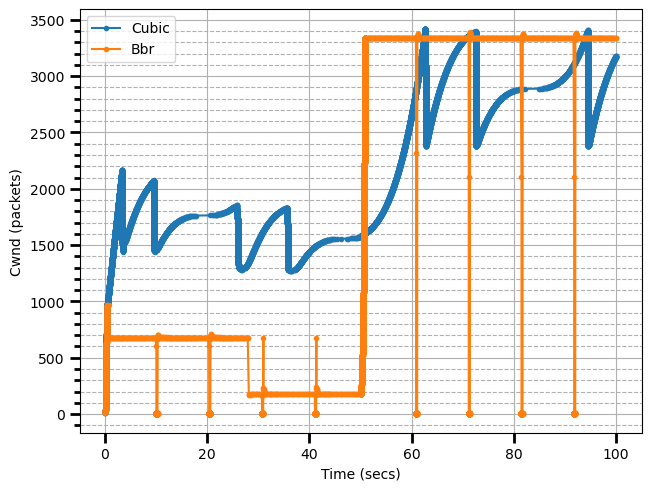

In [52]:
fig, ax1 = plt.subplots(constrained_layout=True)

ax1.plot(
        cwnd_time[0][0].to_numpy(dtype=float), cwnd_value[0][0].to_numpy(dtype=float)/1448.0, '.-',
        cwnd_time[1][0].to_numpy(dtype=float), cwnd_value[1][0].to_numpy(dtype=float)/1448,'.-',
        )

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (secs)')
plt.ylabel(r'Cwnd (packets)')
#plt.xscale('log')
#plt.xticks(x,values)
#plt.yscale('log')
#plt.ylim(0,1000)
#plt.xlim(0,15)
plt.grid(True)
plt.legend([
            tcp_cca[0].replace('minRTT','').replace('Tcp',''), 
            tcp_cca[1].replace('minRTT','').replace('Tcp','')
           ], loc = 'best')
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('single_changing_bw/changing_bw_cwnd_cubic_bbr.png', transparent=True)

/tmp/ipykernel_6677/3205342082.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='minor', linestyle='--')


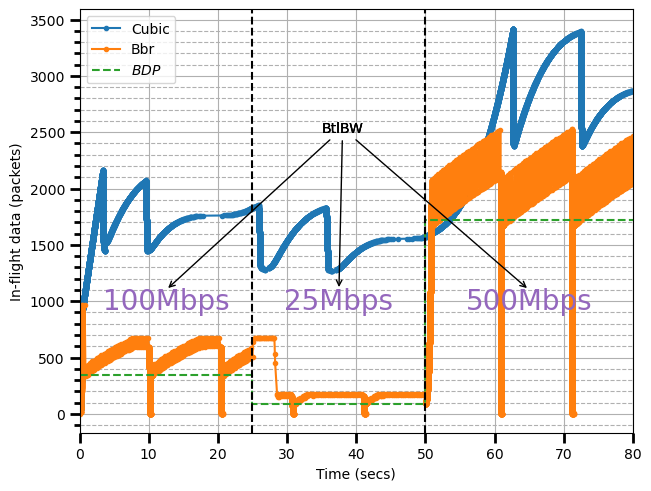

In [53]:
fig, ax1 = plt.subplots(constrained_layout=True)
t = [0, 25, 25, 50, 50, 100]
BDP = [345, 345, 86, 86, 1725, 1725]

ax1.plot(
        cwnd_time[0][0].to_numpy(dtype=float), inflight_value[0][0].to_numpy(dtype=float)/1448.0, '.-',
        cwnd_time[1][0].to_numpy(dtype=float), inflight_value[1][0].to_numpy(dtype=float)/1448,'.-',
        t, BDP, '--'
        )

text_kwargs = dict(ha='center', va='center', fontsize=20, color='C4')
plt.axvline(x = 25, color = 'k', linestyle='--')
plt.axvline(x = 50, color = 'k', linestyle='--')
plt.text(12.5,1000, '100Mbps', **text_kwargs)
plt.text(37.5,1000, '25Mbps', **text_kwargs)
plt.text(65,1000, '500Mbps', **text_kwargs)

arrowprops = dict(
    arrowstyle="->")
ax1.annotate('BtlBW', xy=(12.5,1100), xytext=(35,2500), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(37.5,1100), xytext=(35,2500), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(65,1100), xytext=(35,2500), arrowprops=arrowprops)

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (secs)')
plt.ylabel(r'In-flight data (packets)')
#plt.xscale('log')
#plt.xticks(x,values)
#plt.yscale('log')
#plt.ylim(0,1000)
plt.xlim(0,80)
plt.grid(True)
plt.legend([
            tcp_cca[0].replace('minRTT','').replace('Tcp',''), 
            tcp_cca[1].replace('minRTT','').replace('Tcp',''), 
            '$BDP$'
           ], loc = 'best')
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('single_changing_bw/changing_bw_inflight_cubic_bbr.png', transparent=True)

/tmp/ipykernel_6677/2756326976.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='minor', linestyle='--')


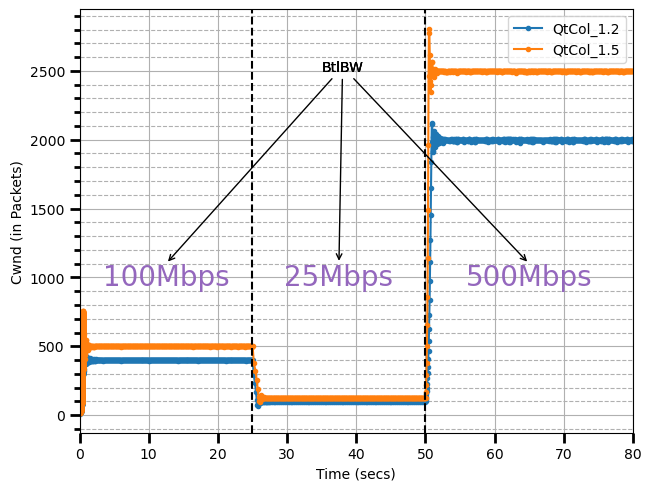

In [54]:
fig, ax1 = plt.subplots(constrained_layout=True)

ax1.plot(
        cwnd_time[2][0].to_numpy(dtype=float), cwnd_value[2][0].to_numpy(dtype=float)/1448.0, '.-',
        cwnd_time[3][0].to_numpy(dtype=float), cwnd_value[3][0].to_numpy(dtype=float)/1448,'.-',
        )

text_kwargs = dict(ha='center', va='center', fontsize=20, color='C4')
plt.axvline(x = 25, color = 'k', linestyle='--')
plt.axvline(x = 50, color = 'k', linestyle='--')
plt.text(12.5,1000, '100Mbps', **text_kwargs)
plt.text(37.5,1000, '25Mbps', **text_kwargs)
plt.text(65,1000, '500Mbps', **text_kwargs)

arrowprops = dict(
    arrowstyle="->")
ax1.annotate('BtlBW', xy=(12.5,1100), xytext=(35,2500), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(37.5,1100), xytext=(35,2500), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(65,1100), xytext=(35,2500), arrowprops=arrowprops)

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (secs)')
plt.ylabel(r'Cwnd (in Packets)')
#plt.xscale('log')
#plt.xticks(x,values)
#plt.yscale('log')
#plt.ylim(0,1000)
plt.xlim(0,80)
plt.grid(True)
plt.legend([
            tcp_cca[2].replace('minRTT','').replace('Tcp',''), 
            tcp_cca[3].replace('minRTT','').replace('Tcp','')
           ], loc = 'best')
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('single_changing_bw/changing_bw_cwnd_qtcol.png', transparent=True)


/tmp/ipykernel_6677/1823508029.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='minor', linestyle='--')


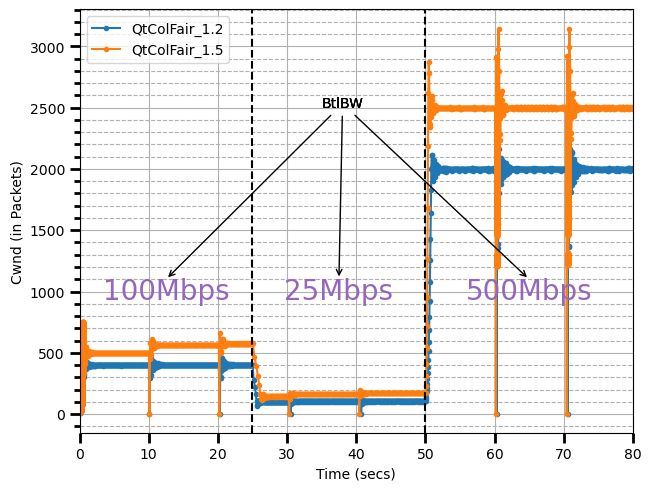

In [55]:
fig, ax1 = plt.subplots(constrained_layout=True)

ax1.plot(
        cwnd_time[4][0].to_numpy(dtype=float), cwnd_value[4][0].to_numpy(dtype=float)/1448.0, '.-',
        cwnd_time[5][0].to_numpy(dtype=float), cwnd_value[5][0].to_numpy(dtype=float)/1448,'.-',
        )

text_kwargs = dict(ha='center', va='center', fontsize=20, color='C4')
plt.axvline(x = 25, color = 'k', linestyle='--')
plt.axvline(x = 50, color = 'k', linestyle='--')
plt.text(12.5,1000, '100Mbps', **text_kwargs)
plt.text(37.5,1000, '25Mbps', **text_kwargs)
plt.text(65,1000, '500Mbps', **text_kwargs)

arrowprops = dict(
    arrowstyle="->")
ax1.annotate('BtlBW', xy=(12.5,1100), xytext=(35,2500), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(37.5,1100), xytext=(35,2500), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(65,1100), xytext=(35,2500), arrowprops=arrowprops)

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (secs)')
plt.ylabel(r'Cwnd (in Packets)')
#plt.xscale('log')
#plt.xticks(x,values)
#plt.yscale('log')
#plt.ylim(0,1000)
plt.xlim(0,80)
plt.grid(True)
plt.legend([
            tcp_cca[4].replace('minRTT','').replace('Tcp',''), 
            tcp_cca[5].replace('minRTT','').replace('Tcp','')
           ], loc = 'best')
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('single_changing_bw/changing_bw_cwnd_qtcolfair.png', transparent=True)

/tmp/ipykernel_6677/3701300157.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='minor', linestyle='--')


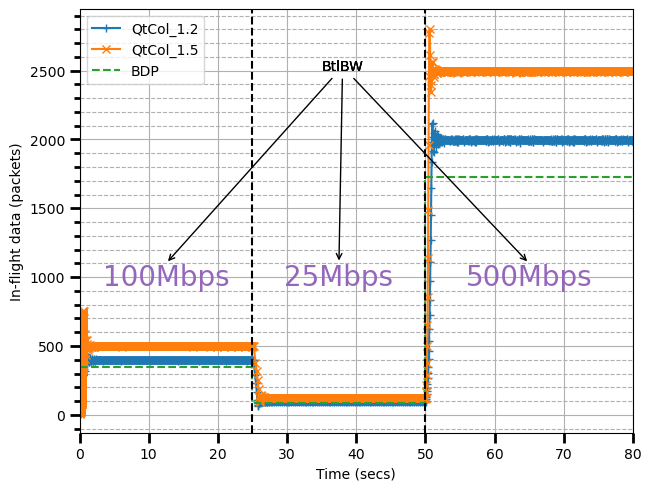

In [56]:
fig, ax1 = plt.subplots(constrained_layout=True)
t = [0, 25, 25, 50, 50, 100]
BDP = [345, 345, 86, 86, 1725, 1725]

ax1.plot(
        cwnd_time[2][0].to_numpy(dtype=float), inflight_value[2][0].to_numpy(dtype=float)/1448.0, '+-',
        cwnd_time[3][0].to_numpy(dtype=float), inflight_value[3][0].to_numpy(dtype=float)/1448,'x-',
        t, BDP, '--'
        )

text_kwargs = dict(ha='center', va='center', fontsize=20, color='C4')
plt.axvline(x = 25, color = 'k', linestyle='--')
plt.axvline(x = 50, color = 'k', linestyle='--')
plt.text(12.5,1000, '100Mbps', **text_kwargs)
plt.text(37.5,1000, '25Mbps', **text_kwargs)
plt.text(65,1000, '500Mbps', **text_kwargs)

arrowprops = dict(
    arrowstyle="->")
ax1.annotate('BtlBW', xy=(12.5,1100), xytext=(35,2500), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(37.5,1100), xytext=(35,2500), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(65,1100), xytext=(35,2500), arrowprops=arrowprops)

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (secs)')
plt.ylabel(r'In-flight data (packets)')
#plt.xscale('log')
#plt.xticks(x,values)
#plt.yscale('log')
#plt.ylim(0,1000)
plt.xlim(0,80)
plt.grid(True)
plt.legend([
            tcp_cca[2].replace('minRTT','').replace('Tcp',''), 
            tcp_cca[3].replace('minRTT','').replace('Tcp',''), 
            'BDP'
           ], loc = 'best')
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('single_changing_bw/changing_bw_inflight_qtcol.png', transparent=True)


/tmp/ipykernel_6677/4110152287.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='minor', linestyle='--')


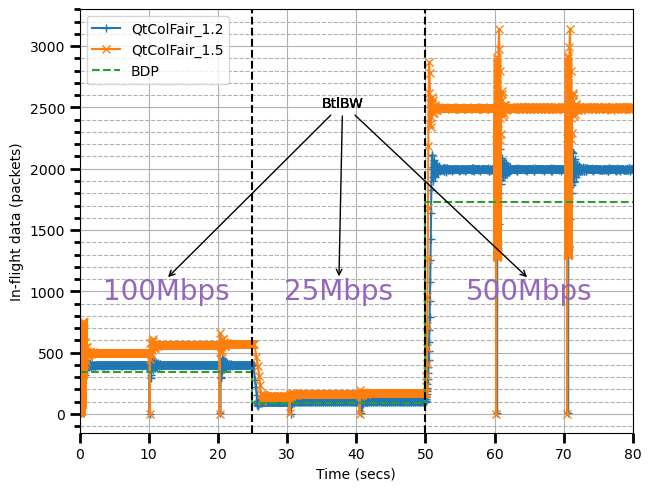

In [57]:
Fig, ax1 = plt.subplots(constrained_layout=True)
t = [0, 25, 25, 50, 50, 100]
BDP = [345, 345, 86, 86, 1725, 1725]

ax1.plot(
        cwnd_time[4][0].to_numpy(dtype=float), inflight_value[4][0].to_numpy(dtype=float)/1448.0, '+-',
        cwnd_time[5][0].to_numpy(dtype=float), inflight_value[5][0].to_numpy(dtype=float)/1448,'x-',
        t, BDP, '--'
        )

text_kwargs = dict(ha='center', va='center', fontsize=20, color='C4')
plt.axvline(x = 25, color = 'k', linestyle='--')
plt.axvline(x = 50, color = 'k', linestyle='--')
plt.text(12.5,1000, '100Mbps', **text_kwargs)
plt.text(37.5,1000, '25Mbps', **text_kwargs)
plt.text(65,1000, '500Mbps', **text_kwargs)

arrowprops = dict(
    arrowstyle="->")
ax1.annotate('BtlBW', xy=(12.5,1100), xytext=(35,2500), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(37.5,1100), xytext=(35,2500), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(65,1100), xytext=(35,2500), arrowprops=arrowprops)

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (secs)')
plt.ylabel(r'In-flight data (packets)')
#plt.xscale('log')
#plt.xticks(x,values)
#plt.yscale('log')
#plt.ylim(0,1000)
plt.xlim(0,80)
plt.grid(True)
plt.legend([
            tcp_cca[4].replace('minRTT','').replace('Tcp',''), 
            tcp_cca[5].replace('minRTT','').replace('Tcp',''), 
            'BDP'
           ], loc = 'best')
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('single_changing_bw/changing_bw_inflight_qtcolfair.png', transparent=True)

/tmp/ipykernel_6677/301667324.py:30: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='minor', linestyle='--')


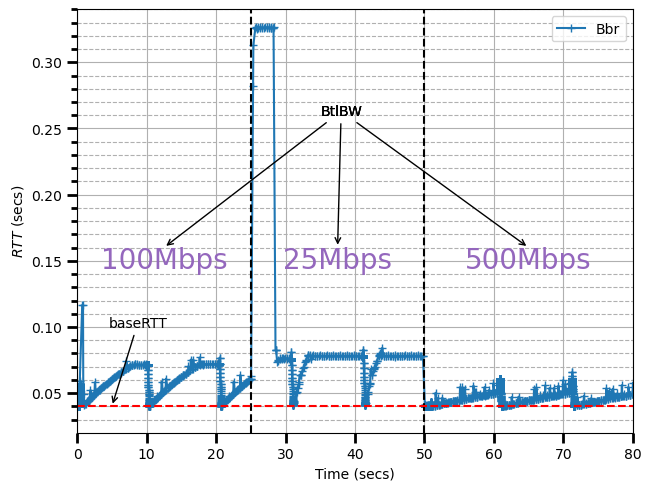

In [111]:
fig, ax1 = plt.subplots(constrained_layout=True)

ax1.plot(
        cwnd_time[1][0].to_numpy(dtype=float), rtt_value[1][0].to_numpy(dtype=float),'+-'
        )

text_kwargs = dict(ha='center', va='center', fontsize=20, color='C4')
plt.axvline(x = 25, color = 'k', linestyle='--')
plt.axvline(x = 50, color = 'k', linestyle='--')
plt.text(12.5,0.15, '100Mbps', **text_kwargs)
plt.text(37.5,0.15, '25Mbps', **text_kwargs)
plt.text(65,0.15, '500Mbps', **text_kwargs)

arrowprops = dict(
    arrowstyle="->")
ax1.annotate('BtlBW', xy=(12.5,0.16), xytext=(35,0.26), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(37.5,0.16), xytext=(35,0.26), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(65,0.16), xytext=(35,0.26), arrowprops=arrowprops)

plt.axhline(y = 0.04, color = 'red', linestyle='--')

arrowprops = dict(
    arrowstyle="->")
ax1.annotate('baseRTT', xy=(5,0.04), xytext=(4.5,0.10), arrowprops=arrowprops)

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (secs)')
#plt.ylabel(r'rtt (secs)')
ax1.set_ylabel(r'$RTT$ (secs)')
#plt.xscale('log')
#plt.xticks(x,values)
#plt.yscale('log')
plt.ylim(0.02,0.34)
plt.xlim(0,80)
plt.grid(True)
ax1.legend([
            tcp_cca[1].replace('minRTT','').replace('Tcp','')
           ], loc = 'best')
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('single_changing_bw/changing_bw_rtt_bbr.png', transparent=True)



/tmp/ipykernel_6677/1107802977.py:37: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='minor', linestyle='--')


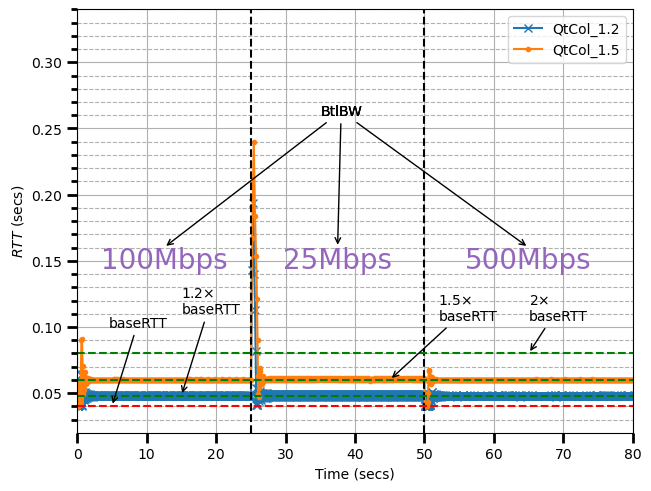

In [109]:
fig, ax1 = plt.subplots(constrained_layout=True)

ax1.plot(
        cwnd_time[2][0].to_numpy(dtype=float), rtt_value[2][0].to_numpy(dtype=float),'x-',
        cwnd_time[3][0].to_numpy(dtype=float), rtt_value[3][0].to_numpy(dtype=float),'.-'
        )

text_kwargs = dict(ha='center', va='center', fontsize=20, color='C4')
plt.axvline(x = 25, color = 'k', linestyle='--')
plt.axvline(x = 50, color = 'k', linestyle='--')
plt.text(12.5,0.15, '100Mbps', **text_kwargs)
plt.text(37.5,0.15, '25Mbps', **text_kwargs)
plt.text(65,0.15, '500Mbps', **text_kwargs)

arrowprops = dict(
    arrowstyle="->")
ax1.annotate('BtlBW', xy=(12.5,0.16), xytext=(35,0.26), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(37.5,0.16), xytext=(35,0.26), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(65,0.16), xytext=(35,0.26), arrowprops=arrowprops)

plt.axhline(y = 0.04, color = 'red', linestyle='--')
plt.axhline(y = 0.048, color = 'g', linestyle='--')
plt.axhline(y = 0.060, color = 'g', linestyle='--')
plt.axhline(y = 0.080, color = 'g', linestyle='--')

arrowprops = dict(
    arrowstyle="->")
ax1.annotate('baseRTT', xy=(5,0.04), xytext=(4.5,0.10), arrowprops=arrowprops)
ax1.annotate(r'1.2$\times$'+'\nbaseRTT', xy=(15,0.048), xytext=(15,0.11), arrowprops=arrowprops)
ax1.annotate(r'2$\times$'+'\nbaseRTT', xy=(65,0.08), xytext=(65,0.105), arrowprops=arrowprops)
ax1.annotate(r'1.5$\times$'+'\nbaseRTT', xy=(45,0.060), xytext=(52,0.105), arrowprops=arrowprops)

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (secs)')
#plt.ylabel(r'rtt (secs)')
ax1.set_ylabel(r'$RTT$ (secs)')
#plt.xscale('log')
#plt.xticks(x,values)
#plt.yscale('log')
plt.ylim(0.02,0.34)
plt.xlim(0,80)
plt.grid(True)
ax1.legend([
            tcp_cca[2].replace('minRTT','').replace('Tcp',''), tcp_cca[3].replace('minRTT','').replace('Tcp','')
           ], loc = 'best')
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('single_changing_bw/changing_bw_rtt_qtcol.png', transparent=True)

/tmp/ipykernel_6677/1135209904.py:31: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='minor', linestyle='--')


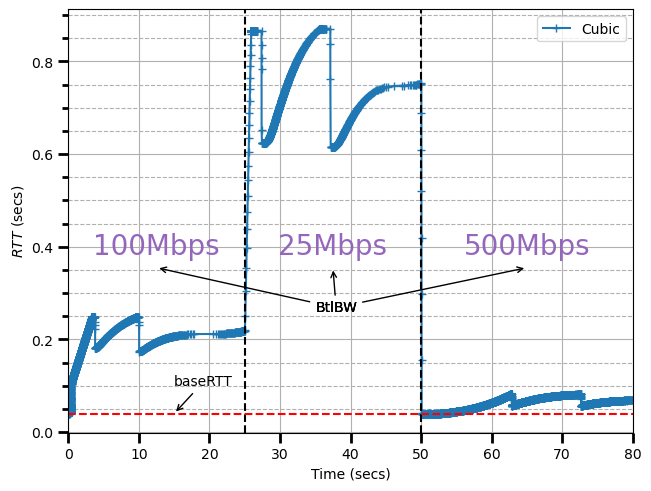

In [108]:
fig, ax1 = plt.subplots(constrained_layout=True)

ax1.plot(
        cwnd_time[0][0].to_numpy(dtype=float), rtt_value[0][0].to_numpy(dtype=float), '+-',
        #cwnd_time[1][0].to_numpy(dtype=float), rtt_value[1][0].to_numpy(dtype=float),'.-'
        )

text_kwargs = dict(ha='center', va='center', fontsize=20, color='C4')
plt.axvline(x = 25, color = 'k', linestyle='--')
plt.axvline(x = 50, color = 'k', linestyle='--')
plt.text(12.5,0.4, '100Mbps', **text_kwargs)
plt.text(37.5,0.4, '25Mbps', **text_kwargs)
plt.text(65,0.4, '500Mbps', **text_kwargs)

arrowprops = dict(
    arrowstyle="->")
ax1.annotate('BtlBW', xy=(12.5,0.355), xytext=(35,0.26), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(37.5,0.355), xytext=(35,0.26), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(65,0.355), xytext=(35,0.26), arrowprops=arrowprops)

plt.axhline(y = 0.04, color = 'red', linestyle='--')

arrowprops = dict(
    arrowstyle="->")
ax1.annotate('baseRTT', xy=(15,0.04), xytext=(15,0.10), arrowprops=arrowprops)

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (secs)')
plt.ylabel(r'$RTT$ (secs)')
#plt.xscale('log')
#plt.xticks(x,values)
#plt.yscale('log')
#plt.ylim(0.02,0.34)
plt.xlim(0,80)
plt.grid(True)
plt.legend([
            tcp_cca[0].replace('minRTT','').replace('Tcp','')
           ], loc = 'best')
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('single_changing_bw/changing_bw_rtt_cubic.png', transparent=True)

/tmp/ipykernel_6677/2374540702.py:37: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='minor', linestyle='--')


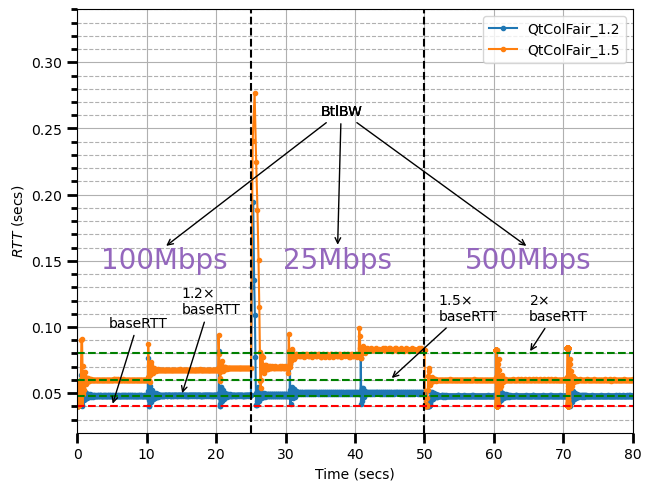

In [105]:
fig, ax1 = plt.subplots(constrained_layout=True)

ax1.plot(
        cwnd_time[4][0].to_numpy(dtype=float), rtt_value[4][0].to_numpy(dtype=float),'.-',
        cwnd_time[5][0].to_numpy(dtype=float), rtt_value[5][0].to_numpy(dtype=float),'.-',
        )

text_kwargs = dict(ha='center', va='center', fontsize=20, color='C4')
plt.axvline(x = 25, color = 'k', linestyle='--')
plt.axvline(x = 50, color = 'k', linestyle='--')
plt.text(12.5,0.15, '100Mbps', **text_kwargs)
plt.text(37.5,0.15, '25Mbps', **text_kwargs)
plt.text(65,0.15, '500Mbps', **text_kwargs)

arrowprops = dict(
    arrowstyle="->")
ax1.annotate('BtlBW', xy=(12.5,0.16), xytext=(35,0.26), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(37.5,0.16), xytext=(35,0.26), arrowprops=arrowprops)
ax1.annotate('BtlBW', xy=(65,0.16), xytext=(35,0.26), arrowprops=arrowprops)

plt.axhline(y = 0.04, color = 'red', linestyle='--')
plt.axhline(y = 0.048, color = 'g', linestyle='--')
plt.axhline(y = 0.060, color = 'g', linestyle='--')
plt.axhline(y = 0.080, color = 'g', linestyle='--')

arrowprops = dict(
    arrowstyle="->")
ax1.annotate('baseRTT', xy=(5,0.04), xytext=(4.5,0.10), arrowprops=arrowprops)
ax1.annotate(r'1.2$\times$'+'\nbaseRTT', xy=(15,0.048), xytext=(15,0.11), arrowprops=arrowprops)
ax1.annotate(r'2$\times$'+'\nbaseRTT', xy=(65,0.08), xytext=(65,0.105), arrowprops=arrowprops)
ax1.annotate(r'1.5$\times$'+'\nbaseRTT', xy=(45,0.060), xytext=(52,0.105), arrowprops=arrowprops)

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (secs)')
plt.ylabel(r'$RTT$ (secs)')
#plt.xscale('log')
#plt.xticks(x,values)
#plt.yscale('log')
plt.ylim(0.02,0.34)
plt.xlim(0,80)
plt.grid(True)
plt.legend([
            tcp_cca[4].replace('minRTT','').replace('Tcp',''), tcp_cca[5].replace('minRTT','').replace('Tcp','')
           ], loc = 'best')
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('single_changing_bw/changing_bw_rtt_qtcolfair.png', transparent=True)

/tmp/ipykernel_6677/2300961128.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='minor', linestyle='--')


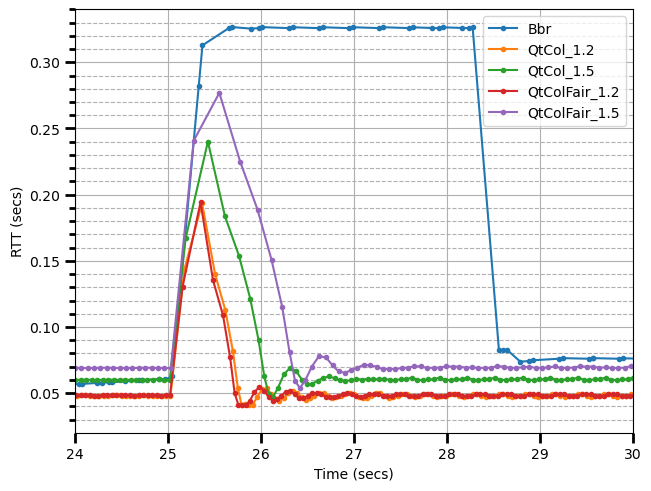

In [62]:
fig, ax1 = plt.subplots(constrained_layout=True)

ax1.plot(
        cwnd_time[1][0].to_numpy(dtype=float), rtt_value[1][0].to_numpy(dtype=float),'.-',
        cwnd_time[2][0].to_numpy(dtype=float), rtt_value[2][0].to_numpy(dtype=float),'.-',
        cwnd_time[3][0].to_numpy(dtype=float), rtt_value[3][0].to_numpy(dtype=float),'.-',
        cwnd_time[4][0].to_numpy(dtype=float), rtt_value[4][0].to_numpy(dtype=float),'.-',
        cwnd_time[5][0].to_numpy(dtype=float), rtt_value[5][0].to_numpy(dtype=float),'.-',
        )

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel('Time (secs)')
plt.ylabel('RTT (secs)')
#plt.xscale('log')
#plt.xticks(x,values)
#plt.yscale('log')
plt.ylim(0.02,0.34)
plt.xlim(24,30)
plt.grid(True)
plt.legend([
            tcp_cca[1].replace('minRTT','').replace('Tcp',''), 
            tcp_cca[2].replace('minRTT','').replace('Tcp',''), 
            tcp_cca[3].replace('minRTT','').replace('Tcp',''), 
            tcp_cca[4].replace('minRTT','').replace('Tcp',''), 
            tcp_cca[5].replace('minRTT','').replace('Tcp','')
           ], loc = 'best')
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('single_changing_bw/changing_bw_rtt_adjust_delay.png', transparent=True)

In [68]:
x0 = rtt_value[0][0].to_numpy(dtype=float)
x1 = rtt_value[1][0].to_numpy(dtype=float)
x2 = rtt_value[2][0].to_numpy(dtype=float)
x3 = rtt_value[3][0].to_numpy(dtype=float)
x4 = rtt_value[4][0].to_numpy(dtype=float)
x5 = rtt_value[5][0].to_numpy(dtype=float)

print(x0[0])

[0.04]


/tmp/ipykernel_6677/3150347536.py:43: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='minor', linestyle='--')


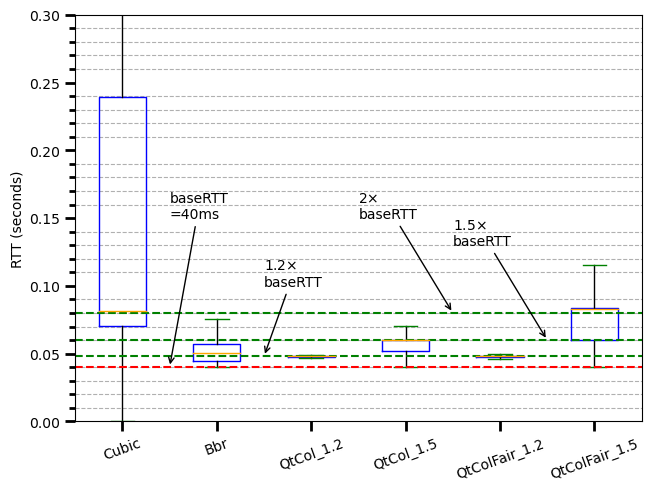

In [78]:
fig, ax1 = plt.subplots(constrained_layout=True)

x0 = agg_rtt_value[0][0].to_numpy(dtype=float)
x1 = agg_rtt_value[1][0].to_numpy(dtype=float)
x2 = agg_rtt_value[2][0].to_numpy(dtype=float)
x3 = agg_rtt_value[3][0].to_numpy(dtype=float)
x4 = agg_rtt_value[4][0].to_numpy(dtype=float)
x5 = agg_rtt_value[5][0].to_numpy(dtype=float)

plt.boxplot ([x0, x1, x2, x3, x4, x5], 
             labels=[tcp_cca[0].replace('Tcp',''), tcp_cca[1].replace('Tcp',''),  
                     tcp_cca[2].replace('minRTT','').replace('Tcp',''), 
                     tcp_cca[3].replace('minRTT','').replace('Tcp',''), 
                     tcp_cca[4].replace('minRTT','').replace('Tcp',''), 
                     tcp_cca[5].replace('minRTT','').replace('Tcp',''),
                    ],
            boxprops=dict(color='blue'),
             #whiskerprops=dict(color='red'),
             capprops=dict(color='green'),
             medianprops=dict(color='orange'),
             showfliers=False
             #flierprops=dict(markerfacecolor='red', marker='.')
            )
plt.xticks(rotation = 20)

plt.axhline(y = 0.04, color = 'red', linestyle='--')
plt.axhline(y = 0.048, color = 'g', linestyle='--')
plt.axhline(y = 0.060, color = 'g', linestyle='--')
plt.axhline(y = 0.080, color = 'g', linestyle='--')

arrowprops = dict(
    arrowstyle="->")
ax1.annotate('baseRTT\n=40ms', xy=(1.5,0.04), xytext=(1.5,0.15), arrowprops=arrowprops)
ax1.annotate(r'1.2$\times$'+'\nbaseRTT', xy=(2.5,0.048), xytext=(2.5,0.1), arrowprops=arrowprops)
ax1.annotate(r'2$\times$'+'\nbaseRTT', xy=(4.5,0.08), xytext=(3.5,0.15), arrowprops=arrowprops)
ax1.annotate(r'1.5$\times$'+'\nbaseRTT', xy=(5.5,0.060), xytext=(4.5,0.13), arrowprops=arrowprops)


ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')
plt.ylabel(r'RTT (seconds)')
plt.ylim(0.0,0.3)

plt.show
plt.savefig('single_static/single_flows_rtt_boxplot_TcpQtColFair.png', transparent=True)